
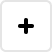
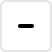
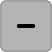
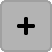
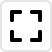
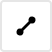
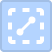

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from lets_plot import *

LetsPlot.setup_html()

In [2]:
economics_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/economics.csv'
economics = pd.read_csv(economics_url)
economics['date'] = pd.to_datetime(economics['date'])
start = datetime(2000, 1, 1)
economics = economics.loc[economics['date'] >= start]

In [3]:
p = (ggplot(economics, aes('date', 'uempmed')) + 
     geom_line() + 
     ylab("unemployment rate") +
     ggsize(600, 400))

In [4]:
# Default

p + scale_x_datetime()

In [5]:
# Formatting to axis labels

(p + 
 scale_x_datetime(format="%b %Y") + 
 scale_y_continuous(format="{} %")
)

In [6]:
# The specified formatting also should be applied to 'breaks'

breaks = pd.date_range(
    pd.to_datetime("2001-01-01"), 
    pd.to_datetime("2016-01-01"), 
    freq='5AS'
).to_pydatetime()

(p + 
 scale_x_datetime(format="%b %Y", breaks=breaks) + 
 scale_y_continuous(format="{} %")
)

In [7]:
# Use date-time formatting in tooltip

(ggplot(economics, aes('date', 'uempmed')) + 
 ylab("unemployment rate") +
 scale_x_datetime() +
 scale_y_continuous() +
 ggsize(600, 400) + 
 geom_line(tooltips=layer_tooltips()
               .line('@uempmed % in @date')
               .format('date', '%B %Y')
               .color("black")
               .anchor("top_left")
               .min_width(170))
)